### LIBRARIES

In [2]:
import pandas as pd
import zstandard as zstd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np

### FILE PATHS

In [3]:
CALENDAR_DATA_V1_PATH = "../data/raw/v1/calendar.csv.zst"
LISTINGS_DATA_V1_PATH = '../data/raw/v1/listings.csv.zst'
REVIEWS_DATA_V1_PATH = '../data/raw/v1/reviews.csv.zst'
SESSIONS_DATA_V1_PATH = '../data/raw/v1/sessions.csv.zst'
USERS_DATA_V1_PATH = '../data/raw/v1/users.csv.zst'



#### LOAD DATA FROM csv.zst

In [4]:
# creating a dataframe for .csv.zst files
def create_dataframe_from_csv_zst(filepath: str) -> pd.DataFrame:

    with open(filepath, 'rb') as compressed:
        dctx = zstd.ZstdDecompressor()
        with dctx.stream_reader(compressed) as reader:
            decompressed = io.TextIOWrapper(reader, encoding='utf-8')
            df = pd.read_csv(decompressed, low_memory=False)
    return df


In [5]:
calendar_dataframe = create_dataframe_from_csv_zst(CALENDAR_DATA_V1_PATH)
listings_dataframe = create_dataframe_from_csv_zst(LISTINGS_DATA_V1_PATH)
reviews_dataframe = create_dataframe_from_csv_zst(REVIEWS_DATA_V1_PATH)
sessions_dataframe = create_dataframe_from_csv_zst(SESSIONS_DATA_V1_PATH)
users_dataframe = create_dataframe_from_csv_zst(USERS_DATA_V1_PATH)

In [6]:
# checking missing values in the dataframes
def check_dataframe_missing_values(df: pd.DataFrame) -> None:
    total_values = len(df)

    df_columns = df.columns

    for col in df_columns:
        missing_values = df[col].isnull().sum()
        missing_percentage = (missing_values / total_values) * 100
        print(f"Column: {col}, Missing Values: {missing_values}, Missing Percentage: {missing_percentage:.2f}%")


def missing_values_visualization(df: pd.DataFrame, title: str, figsize: tuple = (12,6)) -> None:
    plt.figure(figsize=(12, 6))

    counts = []
    for col in df.columns:
        counts.append({'column': col, 'status': 'Existing', 'count': df[col].notnull().sum()})
        counts.append({'column': col, 'status': 'Missing', 'count': df[col].isna().sum()})
    counts_df = pd.DataFrame(counts)

    plt.figure(figsize=figsize)
    sns.barplot(data=counts_df, x='column', y='count', hue='status', edgecolor='black')
    plt.title(title)
    plt.xticks(rotation=90)

    plt.show()


### CALENDAR DF

In [7]:
calendar_dataframe.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3.014252e+07,2025-02-04,t,$80.00,NaN,2.0,1125.0
1,4.976663e+07,2025-01-23,t,$125.00,NaN,1.0,1125.0
2,4.930056e+07,2025-07-30,NaN,$100.00,NaN,NaN,NaN
3,7.431842e+17,2025-03-06,t,NaN,NaN,1.0,1125.0
4,NaN,NaN,t,NaN,NaN,5.0,30.0


#### Missing values

Column: listing_id, Missing Values: 320571, Missing Percentage: 19.99%
Column: date, Missing Values: 320764, Missing Percentage: 20.01%
Column: available, Missing Values: 320643, Missing Percentage: 20.00%
Column: price, Missing Values: 320420, Missing Percentage: 19.99%
Column: adjusted_price, Missing Values: 1603286, Missing Percentage: 100.00%
Column: minimum_nights, Missing Values: 320421, Missing Percentage: 19.99%
Column: maximum_nights, Missing Values: 321261, Missing Percentage: 20.04%


<Figure size 1200x600 with 0 Axes>

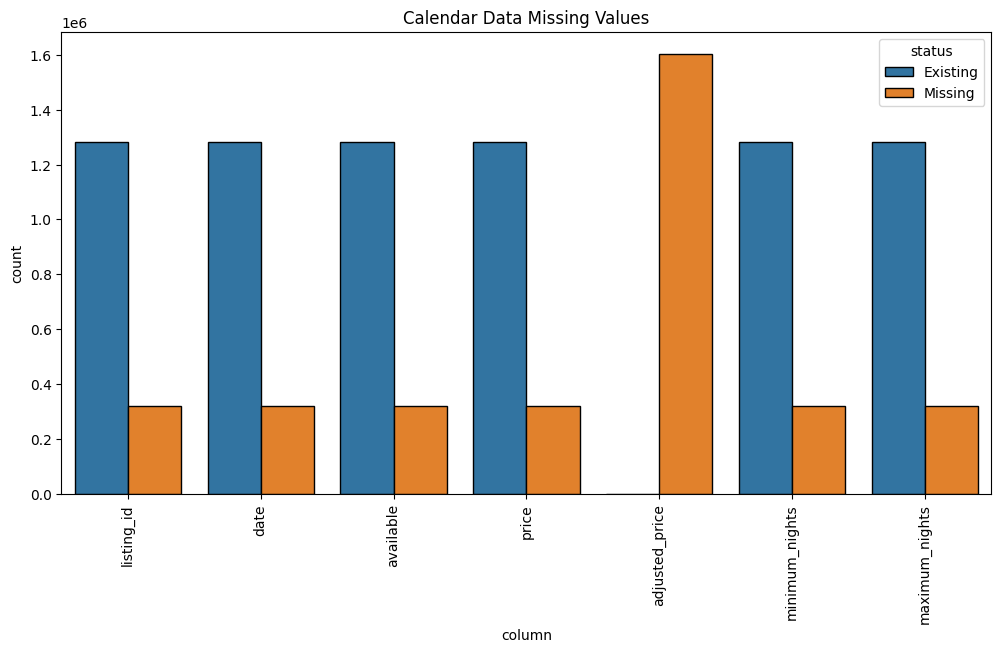

In [8]:
check_dataframe_missing_values(calendar_dataframe)
missing_values_visualization(calendar_dataframe, "Calendar Data Missing Values")

### LISTINGS DF

In [9]:
listings_dataframe.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3.041947e+07,https://www.nocarz.pl/rooms/30419466,2.024123e+13,2024-12-25,NaN,Athenian Niche in Plaka | Athenian Homes,NaN,NaN,https://a0.muscache.com/pictures/f6649b43-fcf6...,135482103.0,...,4.97,NaN,4.91,00000287535,t,12.0,12.0,0.0,0.0,2.51
1,4.998268e+07,https://www.nocarz.pl/rooms/49982681,2.024123e+13,2024-12-26,city scrape,Athenian Apartments - Syntagma sq. #1,Experience the vibrant heartbeat of Athens fro...,There are plenty of sights to see in Athens in...,NaN,NaN,...,NaN,4.91,NaN,00002033718,t,70.0,70.0,0.0,0.0,NaN
2,4.880072e+07,https://www.nocarz.pl/rooms/48800718,2.024123e+13,2024-12-25,city scrape,"Modern Penthouse with Parking, Terrace & BBQ",You will be staying at a unique rooftop Duplex...,Koukaki is a residential area of Athens but at...,https://a0.muscache.com/pictures/miso/Hosting-...,113548208.0,...,4.79,4.71,4.74,00003035440,t,90.0,NaN,0.0,0.0,3.08
3,1.101264e+18,https://www.nocarz.pl/rooms/1101264403993187936,2.024123e+13,2024-12-25,NaN,NaN,At Ma Maison Downtown Villa you will discover ...,Gazi is ideal for discovering Athens because o...,https://a0.muscache.com/pictures/hosting/Hosti...,118181401.0,...,5.00,4.66,4.86,00002489817,t,8.0,8.0,NaN,0.0,3.56
4,NaN,NaN,2.024123e+13,2024-12-25,city scrape,Stylish Contemporary Penthouse - Hip Athens Ce...,"Located in Kolonaki, Central Athens’ upmarket ...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,4899687.0,...,4.99,4.91,4.81,NaN,t,1.0,1.0,0.0,0.0,3.76


Column: id, Missing Values: 909, Missing Percentage: 20.70%
Column: listing_url, Missing Values: 881, Missing Percentage: 20.06%
Column: scrape_id, Missing Values: 891, Missing Percentage: 20.29%
Column: last_scraped, Missing Values: 864, Missing Percentage: 19.67%
Column: source, Missing Values: 852, Missing Percentage: 19.40%
Column: name, Missing Values: 888, Missing Percentage: 20.22%
Column: description, Missing Values: 899, Missing Percentage: 20.47%
Column: neighborhood_overview, Missing Values: 2540, Missing Percentage: 57.83%
Column: picture_url, Missing Values: 883, Missing Percentage: 20.10%
Column: host_id, Missing Values: 892, Missing Percentage: 20.31%
Column: host_url, Missing Values: 872, Missing Percentage: 19.85%
Column: host_name, Missing Values: 854, Missing Percentage: 19.44%
Column: host_since, Missing Values: 921, Missing Percentage: 20.97%
Column: host_location, Missing Values: 1945, Missing Percentage: 44.29%
Column: host_about, Missing Values: 2584, Missing Pe

<Figure size 1200x600 with 0 Axes>

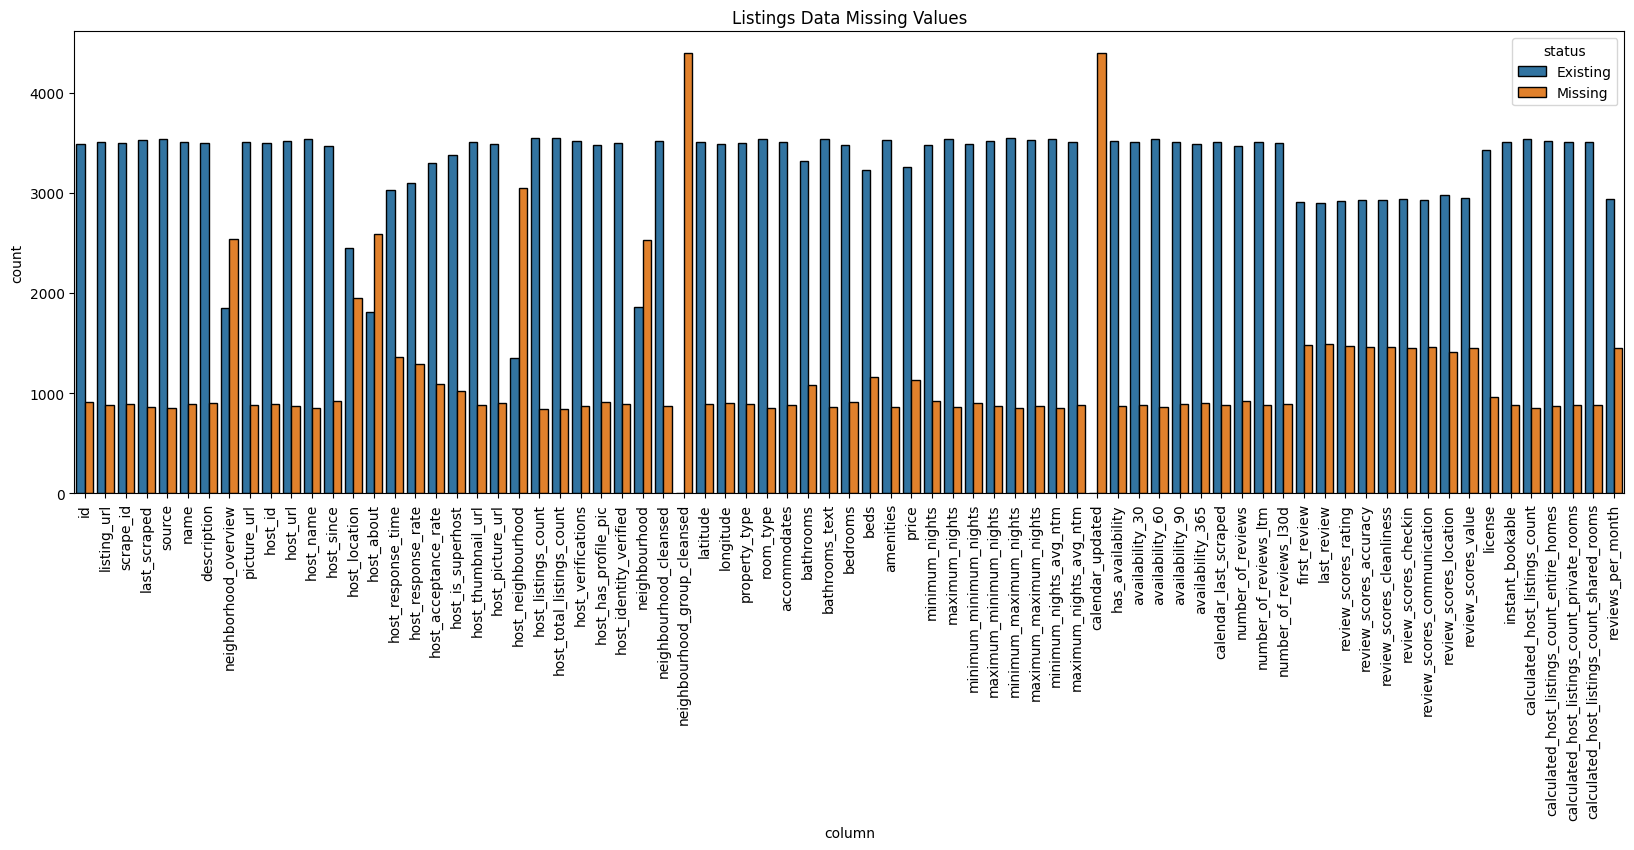

In [10]:
check_dataframe_missing_values(listings_dataframe)
missing_values_visualization(listings_dataframe, "Listings Data Missing Values", figsize=(20, 6))

### REVIEWS DF

In [11]:
reviews_dataframe.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,15029864.0,1.208519e+18,2024-07-25,NaN,Daniel,"ניקוס מאוד עזר, וזמן תגובה ממש מהיר. המיקום נה..."
1,23124958.0,8.396945e+17,2023-03-04,501218607.0,Ivancillo,Everything was perfect and the location was fa...
2,22865582.0,6.338012e+17,NaN,282184671.0,Isak,Nice
3,51336810.0,6.279988e+17,2022-05-16,NaN,Kenna,We had such a great time staying here! The loc...
4,NaN,1.038245e+18,NaN,NaN,Charly,"Très bon logement. <br/>Bien situé, propre. <..."


Column: listing_id, Missing Values: 46517, Missing Percentage: 19.96%
Column: id, Missing Values: 46902, Missing Percentage: 20.12%
Column: date, Missing Values: 46494, Missing Percentage: 19.95%
Column: reviewer_id, Missing Values: 46497, Missing Percentage: 19.95%
Column: reviewer_name, Missing Values: 46743, Missing Percentage: 20.06%
Column: comments, Missing Values: 46397, Missing Percentage: 19.91%


<Figure size 1200x600 with 0 Axes>

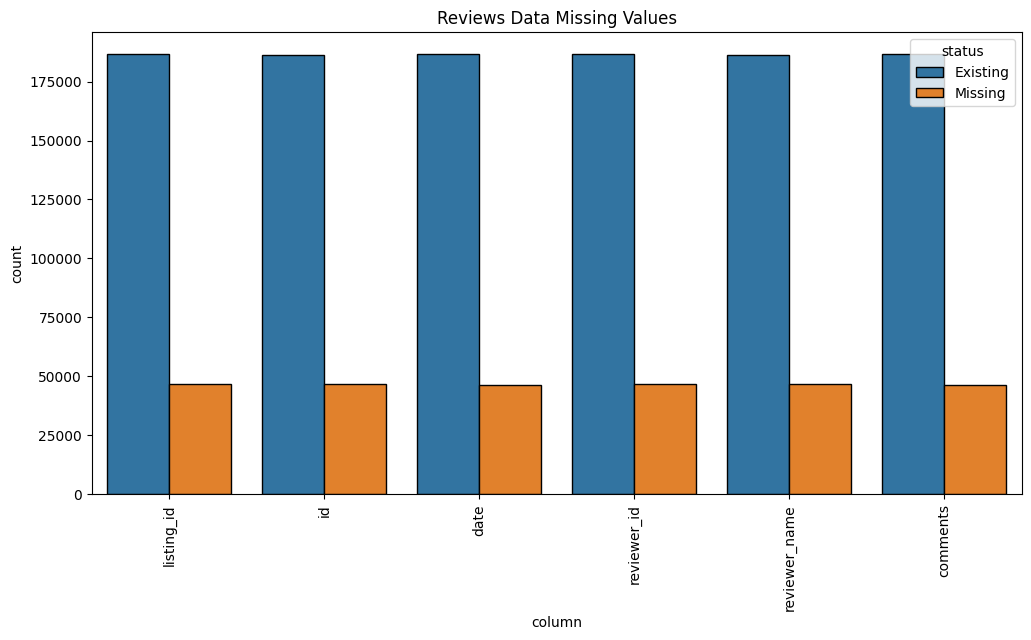

In [12]:
check_dataframe_missing_values(reviews_dataframe)
missing_values_visualization(reviews_dataframe, "Reviews Data Missing Values")

### SESSIONS DF

In [13]:
sessions_dataframe.head(5)

,action,user_id,timestamp,listing_id
0,browse_listings,NaN,2024-06-30T14:44:43.340297,NaN
1,view_listing,24106857.0,2024-06-30T15:08:59.340297,5.169696e+07
2,view_listing,NaN,2024-06-30T15:13:38.340297,9.023092e+17
3,view_listing,24106857.0,NaN,1.126008e+18
4,NaN,24106857.0,NaN,NaN


Column: action, Missing Values: 629445, Missing Percentage: 20.00%
Column: user_id, Missing Values: 628980, Missing Percentage: 19.99%
Column: timestamp, Missing Values: 629690, Missing Percentage: 20.01%
Column: listing_id, Missing Values: 815573, Missing Percentage: 25.92%


<Figure size 1200x600 with 0 Axes>

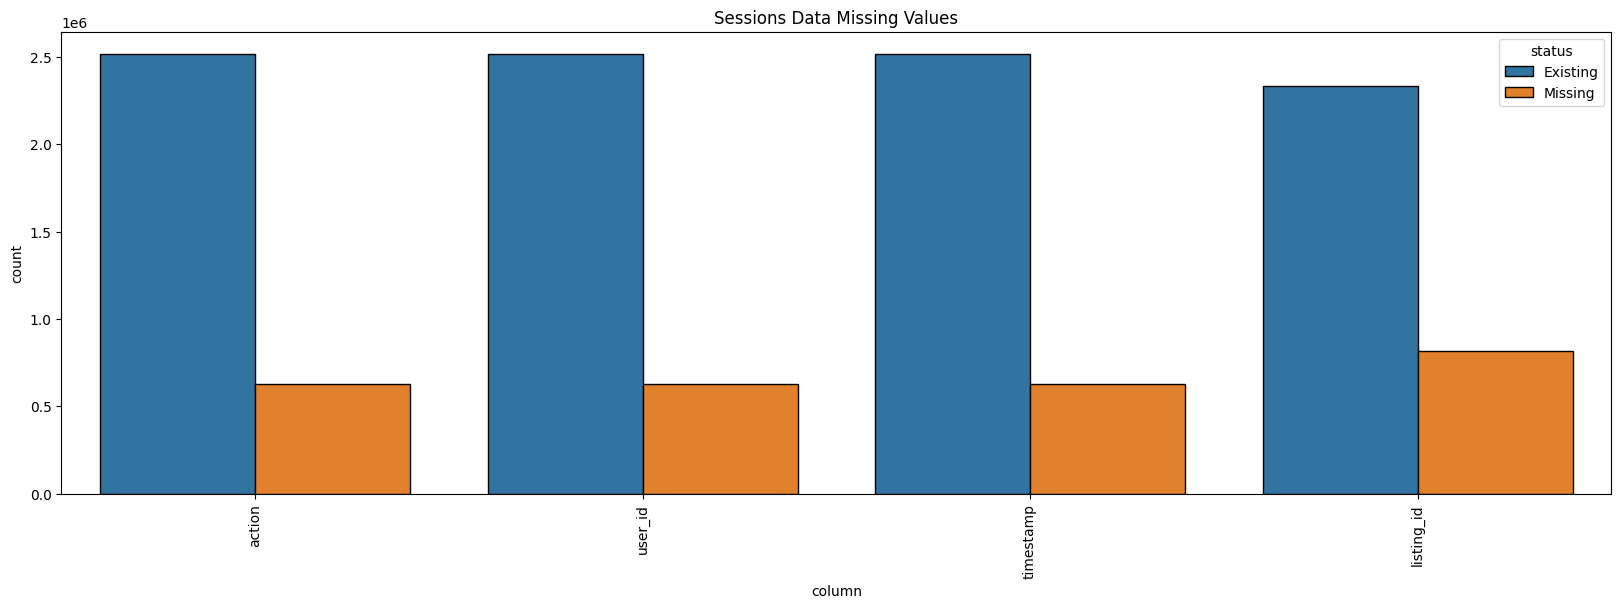

In [14]:
check_dataframe_missing_values(sessions_dataframe)
missing_values_visualization(sessions_dataframe, "Sessions Data Missing Values", figsize=(20, 6))

### USERS DF

In [15]:
users_dataframe.head(5)

,id,name,surname,city,street,street_number,postal_code
0,432845450.0,Julita,NaN,Malbork,NaN,NaN,29-597
1,45257839.0,Apolonia,Jaroch,Sosnowiec,Kwiatowa,29/56,NaN
2,484782310.0,Kalina,Dubik,Będzin,Dobra,97,NaN
3,486291306.0,NaN,Leonowicz,Luboń,Partyzantów,757,80-705
4,NaN,Marianna,Ciołczyk,Oleśnica,Kreta,NaN,89-001


Column: id, Missing Values: 43826, Missing Percentage: 19.97%
Column: name, Missing Values: 44086, Missing Percentage: 20.09%
Column: surname, Missing Values: 43815, Missing Percentage: 19.96%
Column: city, Missing Values: 43863, Missing Percentage: 19.98%
Column: street, Missing Values: 44045, Missing Percentage: 20.07%
Column: street_number, Missing Values: 43690, Missing Percentage: 19.91%
Column: postal_code, Missing Values: 43905, Missing Percentage: 20.00%


<Figure size 1200x600 with 0 Axes>

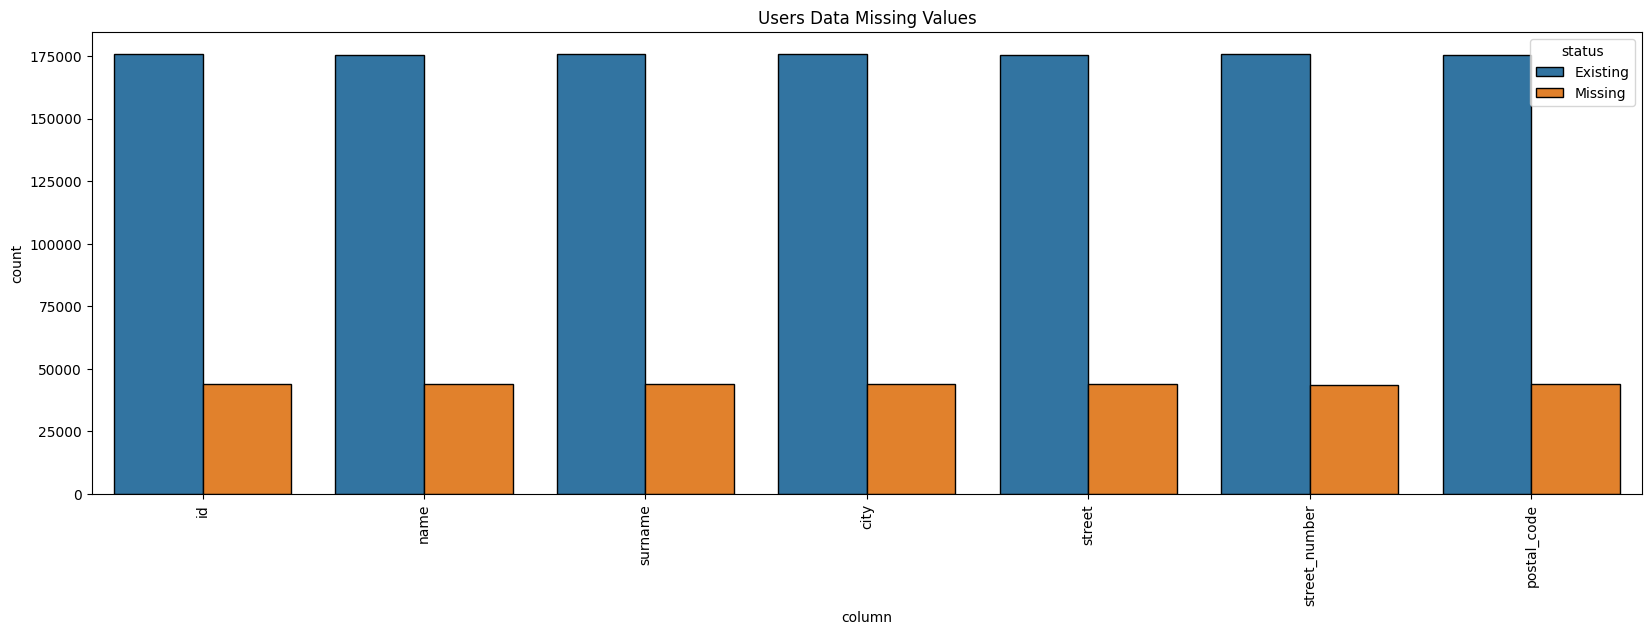

In [16]:
check_dataframe_missing_values(users_dataframe)
missing_values_visualization(users_dataframe, "Users Data Missing Values", figsize=(20, 6))

# EDA

## Calendar

### Cena

In [17]:
# channging price to int
calendar_dataframe['price'] = calendar_dataframe['price'].str.replace('[$,]', '', regex=True).astype(float)

minimal_price = calendar_dataframe['price'].min()
maximal_price = calendar_dataframe['price'].max()
print(f'Minimal price: {minimal_price} $, Maximal price: {maximal_price} $')

Minimal price: 9.0 $, Maximal price: 20000.0 $


In [18]:
pd.set_option('display.float_format', '{:.3f}'.format)
calendar_dataframe['price'].describe()

count   1282866.000
mean        153.706
std         588.441
min           9.000
25%          50.000
50%          75.000
75%         119.000
max       20000.000
Name: price, dtype: float64

In [19]:
# unique listing price
price_dist = pd.DataFrame(calendar_dataframe['price'].groupby(calendar_dataframe['listing_id']).value_counts())

price_dist_df = price_dist.reset_index()

price_dist_df['price'].value_counts()

price
60.000      699
50.000      619
100.000     580
80.000      565
70.000      543
           ... 
1163.000      1
762.000       1
403.000       1
332.000       1
459.000       1
Name: count, Length: 441, dtype: int64

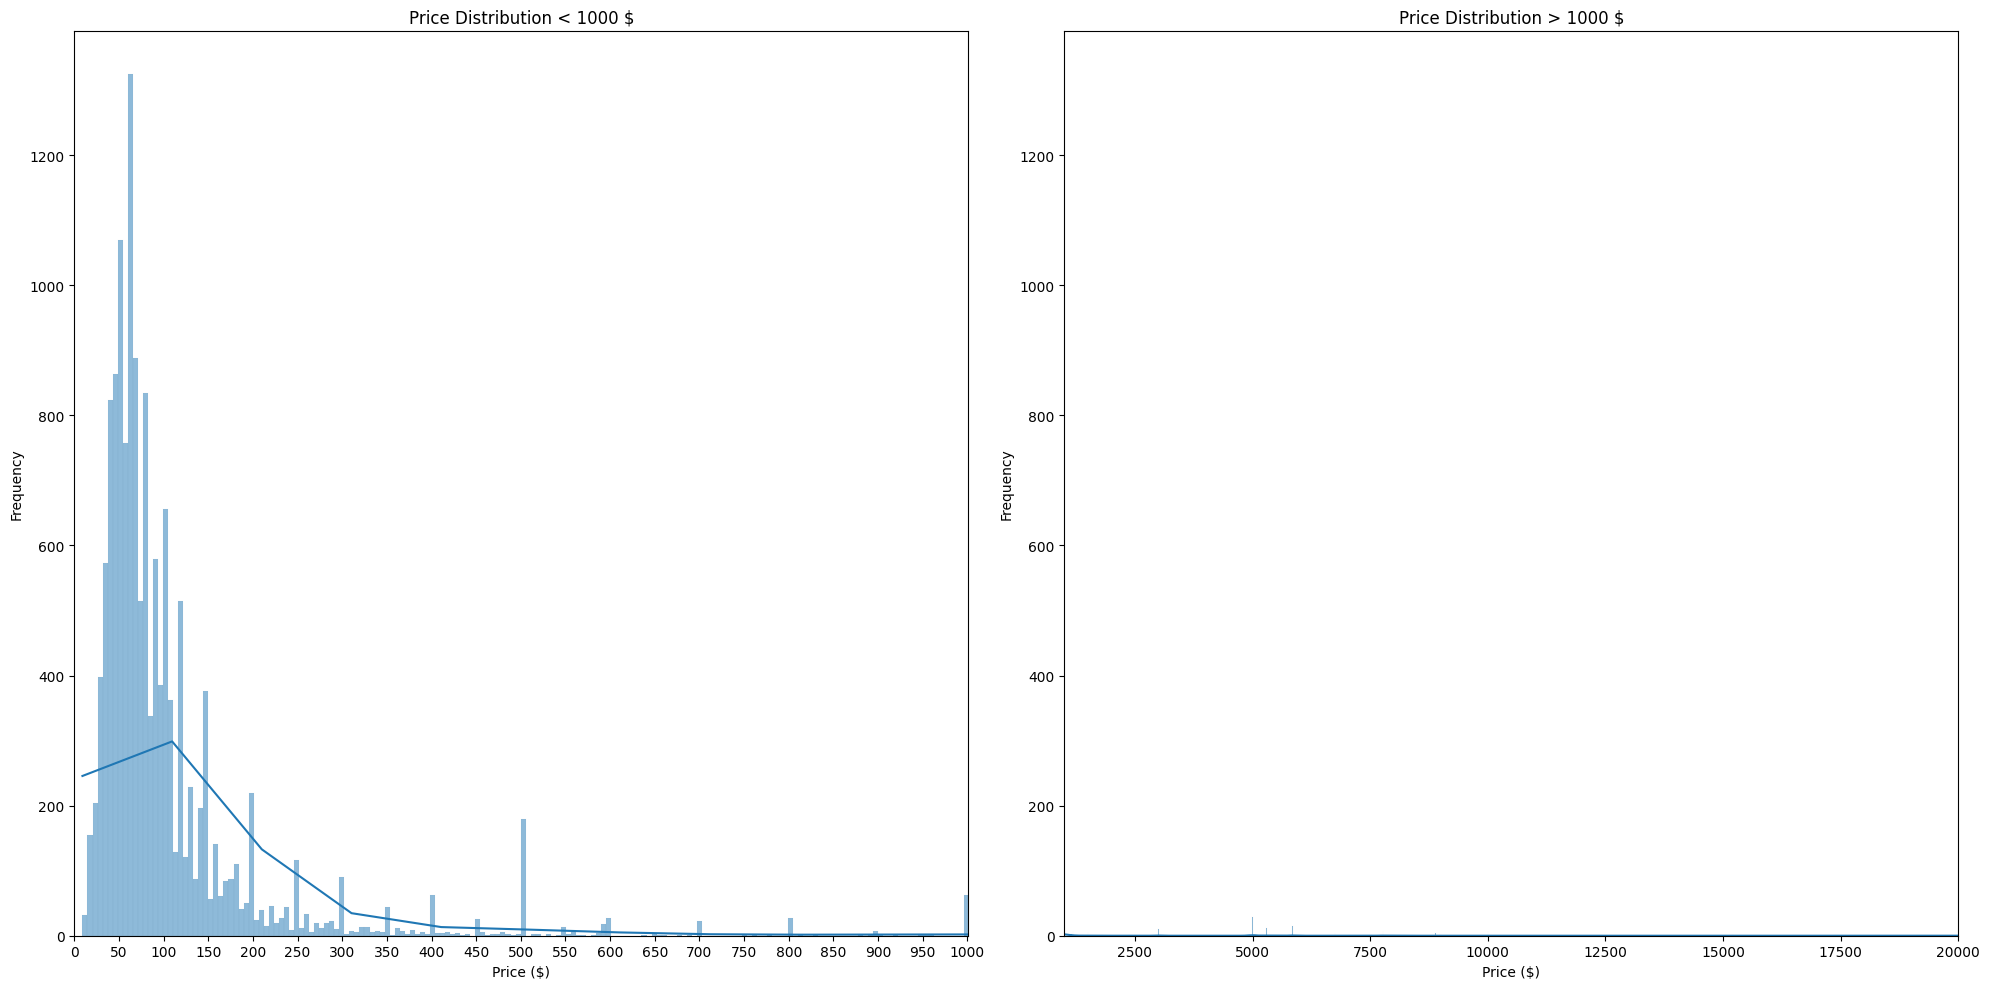

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

sns.histplot(price_dist_df['price'], kde=True, ax=axs[0])
axs[0].set_title('Price Distribution < 1000 $')
axs[0].set_xlim(0, 1001)
axs[0].set_xticks(range(0, 1001, 50))
axs[0].set_xlabel('Price ($)')
axs[0].set_ylabel('Frequency')

sns.histplot(price_dist_df['price'], kde=True, ax=axs[1])
axs[1].set_title('Price Distribution > 1000 $')
axs[1].set_xlim(1001, 20001)
axs[1].set_xlabel('Price ($)')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

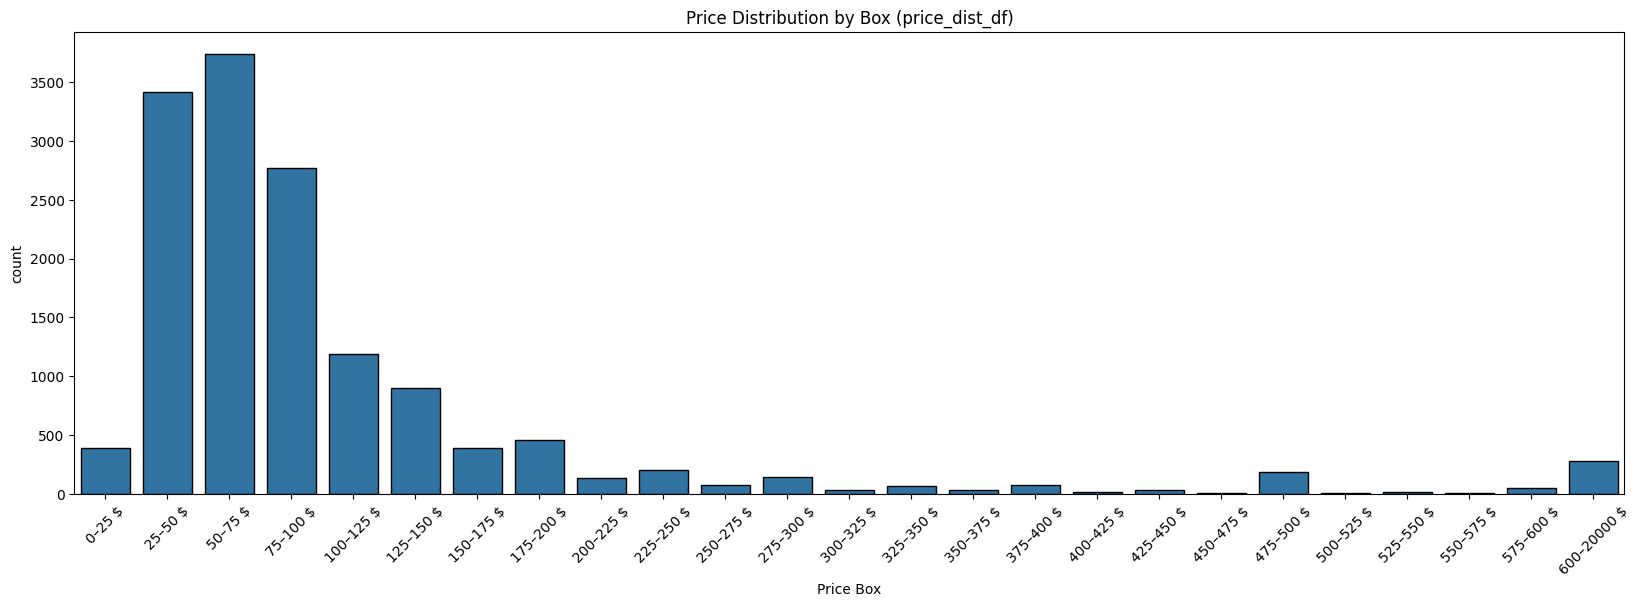

In [21]:
boxes = list(range(0, 601, 25)) + [int(maximal_price)]

labels = [f"{boxes[i]}–{boxes[i+1]} $" for i in range(len(boxes)-1)]

price_dist_df['price_box'] = pd.cut(
    price_dist_df['price'],
    bins=boxes,
    labels=labels,
    include_lowest=True
)

plt.figure(figsize=(20, 6))
sns.countplot(data=price_dist_df, x='price_box', edgecolor='black')
plt.xticks(rotation=45)
plt.title('Price Distribution by Box (price_dist_df)')
plt.xlabel('Price Box')
plt.show()


### Dostępność ofert

In [22]:
availability_counts = calendar_dataframe.groupby(['listing_id', 'available']).size().reset_index(name='count')

availability_counts['price'] = calendar_dataframe.groupby(['listing_id', 'available'])['price'].first().values
availability_counts.head()

,listing_id,available,count,price
0,27262.000,f,3,73.000
1,27262.000,t,58,73.000
2,33945.000,t,81,29.000
3,49489.000,f,3,150.000
4,49489.000,t,64,150.000


/tmp/ipykernel_6481/3564965762.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hist_data = merged_df.groupby(['price_box', 'available'])['count'].sum().unstack(fill_value=0)


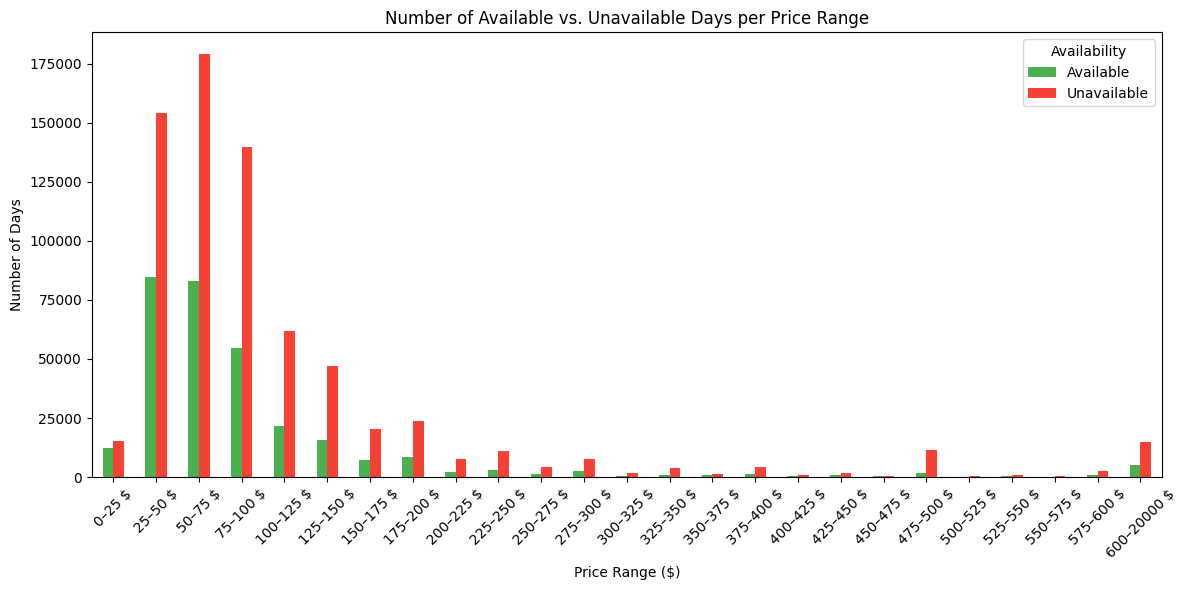

In [23]:
merged_df = pd.merge(
    availability_counts,
    price_dist_df[['listing_id', 'price_box']],
    on='listing_id',
    how='left'
)
hist_data = merged_df.groupby(['price_box', 'available'])['count'].sum().unstack(fill_value=0)

hist_data.plot(kind='bar', stacked=False, figsize=(12, 6), color=['#4CAF50', '#F44336'])

plt.title('Number of Available vs. Unavailable Days per Price Range')
plt.xlabel('Price Range ($)')
plt.ylabel('Number of Days')
plt.xticks(rotation=45)
plt.legend(title='Availability', labels=['Available', 'Unavailable'])
plt.tight_layout()
plt.show()

### Cena w czasie

In [24]:
date_prices = calendar_dataframe['price'].groupby(calendar_dataframe['date']).agg(['median','mean', 'min', 'max']).sort_values(by='date', ascending=True)

date_prices.reset_index(inplace=True)

date_prices.head(10)

,date,median,mean,min,max
0,2024-12-25,70.000,128.318,10.000,10000.000
1,2024-12-26,75.000,140.130,10.000,8888.000
2,2024-12-27,75.000,157.830,10.000,20000.000
3,2024-12-28,75.000,153.119,10.000,10000.000
4,2024-12-29,75.000,141.625,10.000,15000.000
5,2024-12-30,74.000,125.646,10.000,10000.000
6,2024-12-31,75.000,159.625,10.000,10000.000
7,2025-01-01,75.000,144.183,10.000,10000.000
8,2025-01-02,75.000,151.936,9.000,10000.000
9,2025-01-03,75.000,148.525,9.000,20000.000


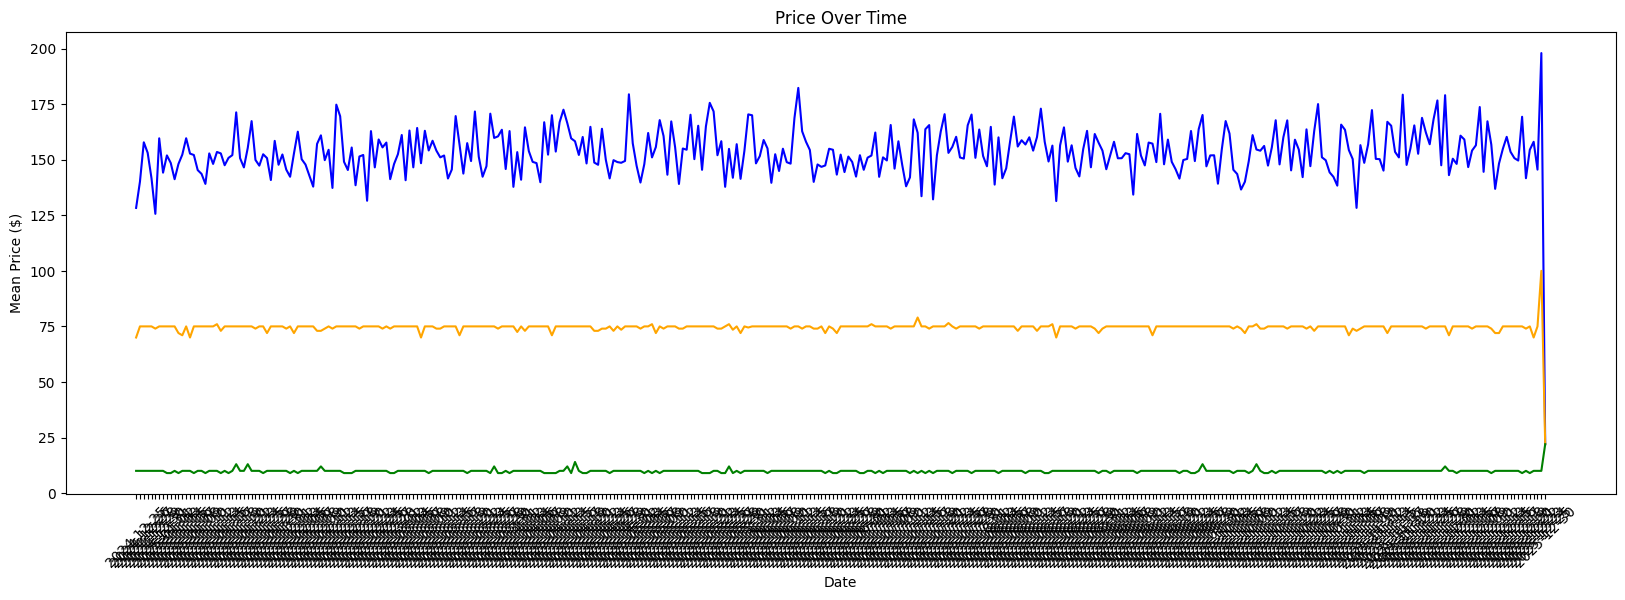

In [25]:
mean_price = date_prices['mean'].values
median_price = date_prices['median'].values
min_price = date_prices['min'].values

# mean and median price over time
plt.figure(figsize=(20, 6))
plt.plot(date_prices['date'], mean_price, label='Mean Price', color='blue')
plt.plot(date_prices['date'], median_price, label='Median Price', color='orange')
plt.plot(date_prices['date'], min_price, label='Min Price', color='green')
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Price ($)')
plt.xticks(rotation=45)
plt.show()

In [26]:
date_prices["date"].min(), date_prices["date"].max()

('2024-12-25', '2025-12-30')

### Miesięczne boxploty

In [27]:
date_series = pd.to_datetime(date_prices['date'], format='%Y-%m-%d')
date_prices['date'] = date_series
date_prices['year'] = date_prices['date'].dt.year
date_prices['month'] = date_prices['date'].dt.month
date_prices['day'] = date_prices['date'].dt.day

date_prices.head()

,date,median,mean,min,max,year,month,day
0,2024-12-25,70.000,128.318,10.000,10000.000,2024,12,25
1,2024-12-26,75.000,140.130,10.000,8888.000,2024,12,26
2,2024-12-27,75.000,157.830,10.000,20000.000,2024,12,27
3,2024-12-28,75.000,153.119,10.000,10000.000,2024,12,28
4,2024-12-29,75.000,141.625,10.000,15000.000,2024,12,29


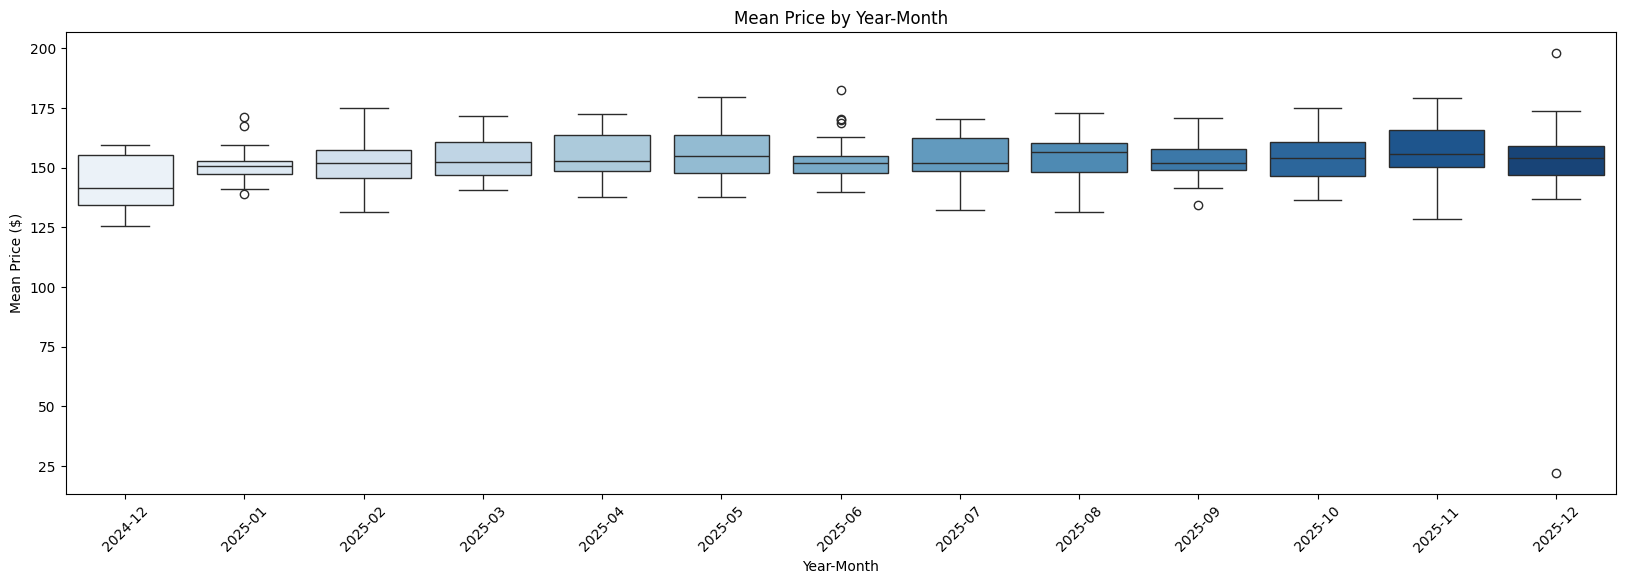

In [28]:
# year-moth price boxplot
filtered = date_prices[
    (date_prices['date'] >= '2024-11-01') &
    (date_prices['date'] <= '2026-01-31')
].copy()

# create a new column for year-month labels
filtered['year_month'] = filtered['date'].dt.strftime('%Y-%m')

plt.figure(figsize=(20, 6))
sns.boxplot(data=filtered, x='year_month', y='mean', palette='Blues', hue='year_month')
plt.title('Mean Price by Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Mean Price ($)')
plt.xticks(rotation=45)
plt.show()

- Brakuje danych wcześniejszych niż 2024-12
- Analiza może bazować praktycznie na kilkunastu miesiącach, z czego ponad połowa to dane przyszłe, które mogą uleć zmianie np. odowłanie rezerwacji itp..

## Listings

In [29]:
listings_dataframe.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [30]:
listings_dataframe["host_response_rate"].unique()

array([nan, '100%', '90%', '98%', '93%', '95%', '99%', '50%', '96%',
       '75%', '92%', '0%', '80%', '97%', '20%', '86%', '89%', '60%',
       '91%', '83%', '67%', '33%', '84%', '72%', '88%', '94%', '78%',
       '87%', '70%'], dtype=object)

In [31]:
listings_dataframe = listings_dataframe.copy()

# split location
listings_dataframe[['host_city', 'host_country']] = listings_dataframe['host_location'].str.split(',', n=1, expand=True)

# remove white spaces
listings_dataframe['host_city'] = listings_dataframe['host_city'].str.strip()
listings_dataframe['host_country'] = listings_dataframe['host_country'].str.strip()

# mask for missing values
mask_country_only = listings_dataframe['host_country'].isna() & listings_dataframe['host_city'].notna()
listings_dataframe.loc[mask_country_only, 'host_country'] = listings_dataframe.loc[mask_country_only, 'host_city']
listings_dataframe.loc[mask_country_only, 'host_city'] = None

listings_dataframe[['host_city', 'host_country']].head()

,host_city,host_country
0,Athens,Greece
1,Athens,Greece
2,Athens,Greece
3,Athens,Greece
4,London,United Kingdom


### Najpopularniejsze miasta i kraje

In [32]:
top_10_cities = listings_dataframe['host_city'].value_counts().nlargest(10)
print(f"Top 10 cities with the most hosts:\n{top_10_cities}")

Top 10 cities with the most hosts:
host_city
Athens           1721
London             27
Heraklion          26
Athina             25
Chalandri          25
Palaio Faliro      23
Glyfada            21
Tel Aviv-Yafo      17
Kifisia            15
Barcelona          14
Name: count, dtype: int64


In [33]:
top_10_countries = listings_dataframe['host_country'].value_counts().nlargest(10)
print(f"Top 10 countries with the most hosts:\n{top_10_countries}")

Top 10 countries with the most hosts:
host_country
Greece            2242
United Kingdom      43
Israel              35
Cyprus              16
Spain               14
Germany             14
Netherlands         12
Switzerland          9
France               8
Canada               4
Name: count, dtype: int64


### Ile ogłoszeń mają gospodarze

In [34]:
# ile ogłoszeń mają gospodarze
listings_per_host = listings_dataframe.groupby('host_id').size()
listings_per_host = listings_per_host.reset_index(name='number_of_listings')
listings_per_host = listings_per_host.sort_values(by='number_of_listings', ascending=False)
listings_per_host.reset_index(drop=True, inplace=True)
listings_per_host.head(10)

,host_id,number_of_listings
0,20104194.000,31
1,541226109.000,28
2,113548208.000,25
3,488084007.000,19
4,90390850.000,19
5,63903716.000,19
6,123074489.000,18
7,2089542.000,17
8,748818.000,17
9,113353393.000,16


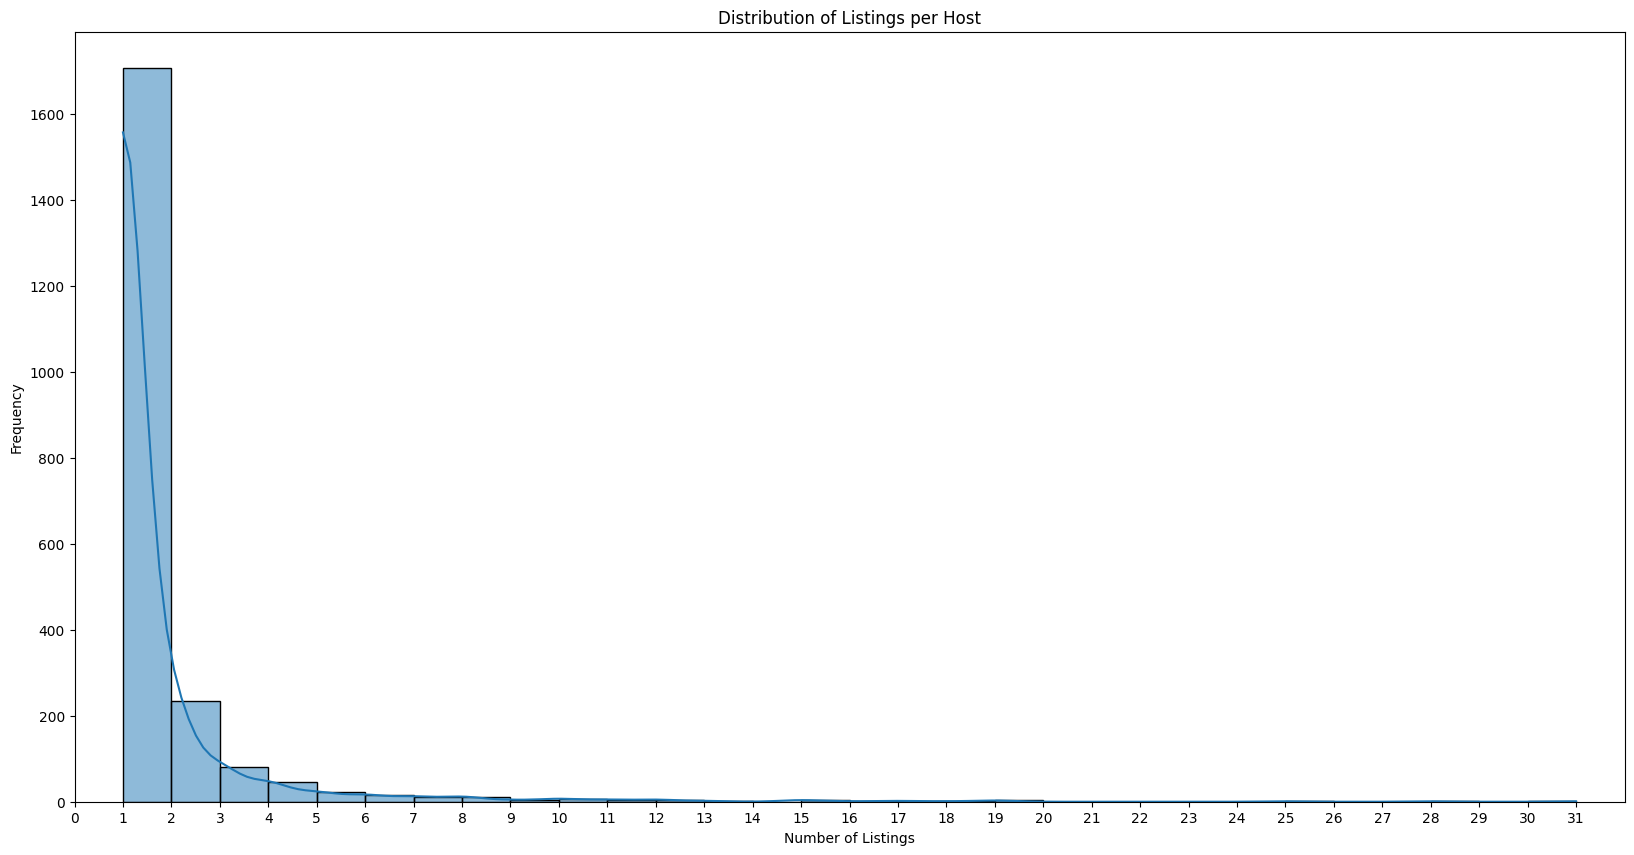

In [35]:
plt.figure(figsize=(20, 10))
sns.histplot(listings_per_host['number_of_listings'], bins=30, kde=True)
plt.title('Distribution of Listings per Host')
plt.xlabel('Number of Listings')
plt.ylabel('Frequency')
plt.xlim(0, 32)
plt.xticks(range(0, 32, 1))
plt.show()

### Czy superhost mają lepsze oceny?

In [36]:
def nan_count(series):
    return series.isna().sum()

# rating columns
rating_cols = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'reviews_per_month'
]

# calculate mean and nan count for each column
agg_funcs_ratings = {col: ['mean', nan_count] for col in rating_cols}

result_ratings = listings_dataframe.groupby('host_is_superhost').agg(agg_funcs_ratings)

result_ratings.columns = ['_'.join(col).strip() for col in result_ratings.columns.values]

result_ratings

,review_scores_rating_mean,review_scores_rating_nan_count,review_scores_accuracy_mean,review_scores_accuracy_nan_count,review_scores_cleanliness_mean,review_scores_cleanliness_nan_count,review_scores_checkin_mean,review_scores_checkin_nan_count,review_scores_communication_mean,review_scores_communication_nan_count,review_scores_location_mean,review_scores_location_nan_count,review_scores_value_mean,review_scores_value_nan_count,reviews_per_month_mean,reviews_per_month_nan_count
host_is_superhost,,,,,,,,,,,,,,,,
f,4.673,785,4.725,763,4.691,777,4.825,770,4.798,748,4.626,742,4.665,778,1.241,780
t,4.863,353,4.892,358,4.867,346,4.922,341,4.931,375,4.762,345,4.819,340,2.237,351


- Superhost ma lepsze zazwyczaj wyższe oceny oraz mniej brakujących danych

# Reviews

In [37]:
# Ensure both merge keys are floats
reviews_dataframe['listing_id'] = reviews_dataframe['listing_id'].astype(float)
listings_dataframe['id'] = listings_dataframe['id'].astype(float)

# Drop rows without a listing_id to avoid merge issues
reviews_dataframe = reviews_dataframe.dropna(subset=['listing_id'])

# Perform the merge
reviews_listing_dataframe = pd.merge(
    reviews_dataframe,
    listings_dataframe,
    how='inner',
    left_on='listing_id',
    right_on='id'
)


reviews_listing_dataframe.head(5)

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,listing_url,scrape_id,last_scraped,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_city,host_country
0,15029864.000,1208519326531166976.000,2024-07-25,NaN,Daniel,"ניקוס מאוד עזר, וזמן תגובה ממש מהיר. המיקום נה...",15029864.000,https://www.nocarz.pl/rooms/15029864,20241225065837.000,2024-12-25,...,4.670,00000462338,t,2.000,2.000,0.000,0.000,NaN,None,Nicosia
1,26737776.000,293436546.000,2018-07-20,115767079.000,NaN,The place was very nice and really made you fe...,26737776.000,https://www.nocarz.pl/rooms/26737776,20241225065837.000,2024-12-25,...,5.000,00000516636,t,3.000,3.000,0.000,NaN,0.030,Athens,Greece
2,21168927.000,1012163162769882368.000,2023-10-28,445061832.000,Bonita,"Nos encantó, ubicación la mejor, la vista a la...",21168927.000,NaN,20241225065837.000,2024-12-26,...,4.900,00001369945,f,NaN,1.000,0.000,0.000,4.320,None,Greece
3,24787515.000,NaN,NaN,132942942.000,Alicia,"Accueil chaleureux, Anastasia a été une hôte t...",24787515.000,NaN,NaN,NaN,...,4.940,00000140139,f,2.000,NaN,0.000,0.000,3.290,NaN,NaN
4,34383756.000,NaN,2023-05-27,515072144.000,Nicky,Great central Athens location with all ameniti...,34383756.000,https://www.nocarz.pl/rooms/34383756,NaN,2024-12-25,...,4.740,NaN,f,1.000,NaN,0.000,0.000,2.590,Vyronas,Greece


In [38]:
reviews_dataframe.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

### Listingi z największą ilością ocen

In [39]:
top_lisitings = reviews_listing_dataframe.groupby('listing_id')['reviewer_id'].count().sort_values(ascending=False)

top_lisitings = top_lisitings.reset_index(name='number_of_reviews')

top_lisitings.head()

,listing_id,number_of_reviews
0,3431705.000,189
1,13553080.000,169
2,5025556.000,166
3,13842245.000,163
4,13409388.000,146


### Ilość ocen a średnia ocena

In [40]:
avg_ratings = reviews_listing_dataframe.groupby('listing_id')['review_scores_rating'].mean().round(2)

top_lisitings = top_lisitings.drop(columns=['avg_rating'], errors='ignore')
top_lisitings = top_lisitings.merge(avg_ratings, on='listing_id', how='left')

top_lisitings.rename(columns={'review_scores_rating': 'avg_rating'}, inplace=True)

top_lisitings = top_lisitings.sort_values(
    by=['avg_rating', 'number_of_reviews'],
    ascending=False
).reset_index(drop=True)
top_lisitings.head(10)

,listing_id,number_of_reviews,avg_rating
0,34384791.000,47,5.000
1,34712527.000,25,5.000
2,5783504.000,21,5.000
3,50369590.000,17,5.000
4,27709869.000,16,5.000
5,45528915.000,14,5.000
6,1097069591779063680.000,14,5.000
7,39546940.000,14,5.000
8,29478710.000,13,5.000
9,693161059460142336.000,12,5.000


In [41]:
top_lisitings = top_lisitings.sort_values(
    by=['number_of_reviews', 'avg_rating'],
    ascending=False
).reset_index(drop=True)

top_lisitings.head(10)

,listing_id,number_of_reviews,avg_rating
0,3431705.000,189,4.840
1,13553080.000,169,4.840
2,5025556.000,166,NaN
3,13842245.000,163,NaN
4,13409388.000,146,4.870
5,14676028.000,134,4.930
6,10400201.000,127,4.800
7,14146634.000,125,4.910
8,724485.000,118,NaN
9,20083273.000,113,4.930


### Średnia długość opini dla listingów oraz ich ilość 

In [42]:
# count nan and not-nan comments
comments_count = reviews_listing_dataframe.groupby('listing_id')['comments'].apply(lambda x: x.notnull().sum())
comments_count_nan = reviews_listing_dataframe.groupby('listing_id')['comments'].apply(lambda x: x.isna().sum())

# create_new_df
df_comments = pd.DataFrame({
    'listing_id': comments_count.index,
    'non_nan_comments': comments_count.values,
    'nan_comments': comments_count_nan.values
})

df_comments.head(10)

,listing_id,non_nan_comments,nan_comments
0,484925.000,85,25
1,571492.000,11,0
2,571876.000,78,24
3,631150.000,45,9
4,699974.000,17,5
5,709960.000,25,12
6,724485.000,115,27
7,727374.000,106,26
8,800755.000,76,19
9,809874.000,20,6


In [43]:
avg_comment_length = reviews_listing_dataframe.groupby('listing_id')['comments'].apply(
    lambda x: x.dropna().apply(lambda s: len(s.split())).mean() if x.dropna().size > 0 else 0
).round(2)

df_comments['avg_comment_length'] = df_comments['listing_id'].map(avg_comment_length).fillna(0)

df_comments.head(10)

,listing_id,non_nan_comments,nan_comments,avg_comment_length
0,484925.000,85,25,72.930
1,571492.000,11,0,92.000
2,571876.000,78,24,60.730
3,631150.000,45,9,55.040
4,699974.000,17,5,54.820
5,709960.000,25,12,49.720
6,724485.000,115,27,60.970
7,727374.000,106,26,39.840
8,800755.000,76,19,54.760
9,809874.000,20,6,53.050


## Users

In [44]:
users_dataframe.head(5)

,id,name,surname,city,street,street_number,postal_code
0,432845450.000,Julita,NaN,Malbork,NaN,NaN,29-597
1,45257839.000,Apolonia,Jaroch,Sosnowiec,Kwiatowa,29/56,NaN
2,484782310.000,Kalina,Dubik,Będzin,Dobra,97,NaN
3,486291306.000,NaN,Leonowicz,Luboń,Partyzantów,757,80-705
4,NaN,Marianna,Ciołczyk,Oleśnica,Kreta,NaN,89-001


In [45]:
# Missing users info

missing_names = users_dataframe['name'].isna().sum()
missing_surnames = users_dataframe['surname'].isna().sum()
missing_cities = users_dataframe['city'].isna().sum()

print(f"Users dataframe size: {users_dataframe.shape[0]}")
print(f"Missing names: {missing_names}")
print(f"Missing surnames: {missing_surnames}")
print(f"Missing cities: {missing_cities}")

Users dataframe size: 219488
Missing names: 44086
Missing surnames: 43815
Missing cities: 43863


### Najpopularniejsze miasta pochodzenia użytkowników

In [46]:
top_10_cities_users = users_dataframe['city'].value_counts().nlargest(10)
print(f"Top 10 cities with the most users:\n{top_10_cities_users} \n")

least_10_cities_users = users_dataframe['city'].value_counts().nsmallest(10)
print(f"Least 10 cities with the most users:\n{least_10_cities_users}")

Top 10 cities with the most users:
city
Mysłowice         992
Wyszków           947
Kwidzyn           934
Świętochłowice    933
Chrzanów          931
Łaziska Górne     930
Mielec            927
Siedlce           924
Dębica            923
Płońsk            921
Name: count, dtype: int64 

Least 10 cities with the most users:
city
Puławy        798
Świdnica      805
Nowa Ruda     816
Czeladź       817
Rybnik        818
Iława         819
Sandomierz    819
Rzeszów       822
Będzin        824
Malbork       824
Name: count, dtype: int64


### Imiona użytkowników w celu określenia płci

In [47]:
users_names = users_dataframe['name'].value_counts().nlargest(10)
print(f"Top 10 names of users:\n{users_names} \n")

users_least_popular_names = users_dataframe['name'].value_counts().nsmallest(10)
print(f"Least 10 names of users:\n{users_least_popular_names} \n")

Top 10 names of users:
name
Melania     1740
Monika      1730
Anita       1724
Janina      1721
Ida         1718
Blanka      1713
Angelika    1701
Elżbieta    1689
Dorota      1689
Kalina      1682
Name: count, dtype: int64 

Least 10 names of users:
name
Przemysław    798
Daniel        808
Olgierd       819
Emil          822
Wiktor        823
Mieszko       831
Fryderyk      831
Ernest        833
Ksawery       835
Cezary        837
Name: count, dtype: int64 



- Brakuje trochę informacji o dokładnej płci użytkownika, bo płeć może wpływać na preferencja odnośnie wynajmowanego mieszkania

## Sessions

In [48]:
display(sessions_dataframe.head(5))
print("sessions_dataframe size: ", sessions_dataframe.shape[0])

,action,user_id,timestamp,listing_id
0,browse_listings,NaN,2024-06-30T14:44:43.340297,NaN
1,view_listing,24106857.000,2024-06-30T15:08:59.340297,51696957.000
2,view_listing,NaN,2024-06-30T15:13:38.340297,902309243550043904.000
3,view_listing,24106857.000,NaN,1126007697624212992.000
4,NaN,24106857.000,NaN,NaN


sessions_dataframe size:  3147014


### Dostępne akcje

In [49]:
sessions_dataframe['action'].value_counts()

action
view_listing       2144733
book_listing        186476
browse_listings     186360
Name: count, dtype: int64

- Dziwne jest to że użytkownik nie ma możliwości odwołać rezerwacji

In [50]:
display(sessions_dataframe[sessions_dataframe['user_id'].isna()])
display(sessions_dataframe[sessions_dataframe['listing_id'].isna()])

,action,user_id,timestamp,listing_id
0,browse_listings,NaN,2024-06-30T14:44:43.340297,NaN
2,view_listing,NaN,2024-06-30T15:13:38.340297,902309243550043904.000
6,view_listing,NaN,2024-06-30T17:35:18.340297,1131235801642140928.000
8,NaN,NaN,2024-06-30T18:17:40.340297,NaN
9,view_listing,NaN,2024-06-30T19:02:14.340297,1168687047912305920.000
...,...,...,...,...
3146979,view_listing,NaN,2024-04-14T16:40:47.135884,NaN
3146988,browse_listings,NaN,2024-04-14T12:56:38.300786,NaN
3146997,view_listing,NaN,NaN,NaN
3147005,view_listing,NaN,2024-04-14T17:45:42.371619,629945264982240128.000


,action,user_id,timestamp,listing_id
0,browse_listings,NaN,2024-06-30T14:44:43.340297,NaN
4,NaN,24106857.000,NaN,NaN
8,NaN,NaN,2024-06-30T18:17:40.340297,NaN
12,view_listing,NaN,2024-06-30T20:52:33.340297,NaN
14,browse_listings,501218607.000,2024-04-14T12:56:30.475311,NaN
...,...,...,...,...
3146996,browse_listings,67727859.000,2024-04-14T12:56:38.371619,NaN
3146997,view_listing,NaN,NaN,NaN
3147003,view_listing,67727859.000,2024-04-14T16:52:42.371619,NaN
3147008,NaN,351649506.000,2024-04-14T12:56:38.065014,NaN


- Dane w których użytkownik jest NaN albo listing jest NaN są dla nas mał informatywne, bo ciężko będzie połączyć opinie użytkowników z listingiem, albo akcje użytkowników z danym listingiem

### Sesje : ilość odsłon i rezerwacji listingów

In [51]:
listing_actions = sessions_dataframe.groupby('listing_id')['action'].value_counts().unstack().fillna(0)
listing_actions.reset_index(inplace=True)
listing_actions.head(10)

action,listing_id,view_listing,book_listing
0,27262.000,380.000,5.000
1,33945.000,8.000,12.000
2,49489.000,367.000,20.000
3,60394.000,8.000,9.000
4,133835.000,5.000,4.000
5,134340.000,12.000,10.000
6,154243.000,38.000,39.000
7,155654.000,16.000,13.000
8,270611.000,7.000,6.000
9,270954.000,6.000,4.000


- Fajnie żeby sprawdzić jaki jest średni czas użytkownika na danym listingu -> ile czasu przeglądają daną ofertę
- Fajnie też obliczyć co który użytkownika klika book (biorąc pod uwagę czas)

# EDA : dłuższe pobyty
- za dłuższe pobyty uważamy takie, które zostały zabookowane na ponad 5-7 dni
- eksploracja dla tych dancyh, będzie szczególnie ważna dla rozwiazania naszego problemu, ponieważ szukamy co sprawia, że dla tych ofert rezerwacje są dłuższe

### Ilość rezerwacji trwających dłużej niż k dni

Listings with at least one reservation longer than 1 days: 272809
Listings with at least one reservation longer than 2 days: 30880
Listings with at least one reservation longer than 3 days: 4628
Listings with at least one reservation longer than 4 days: 750
Listings with at least one reservation longer than 5 days: 100
Listings with at least one reservation longer than 6 days: 17
Listings with at least one reservation longer than 7 days: 1
Listings with at least one reservation longer than 8 days: 0


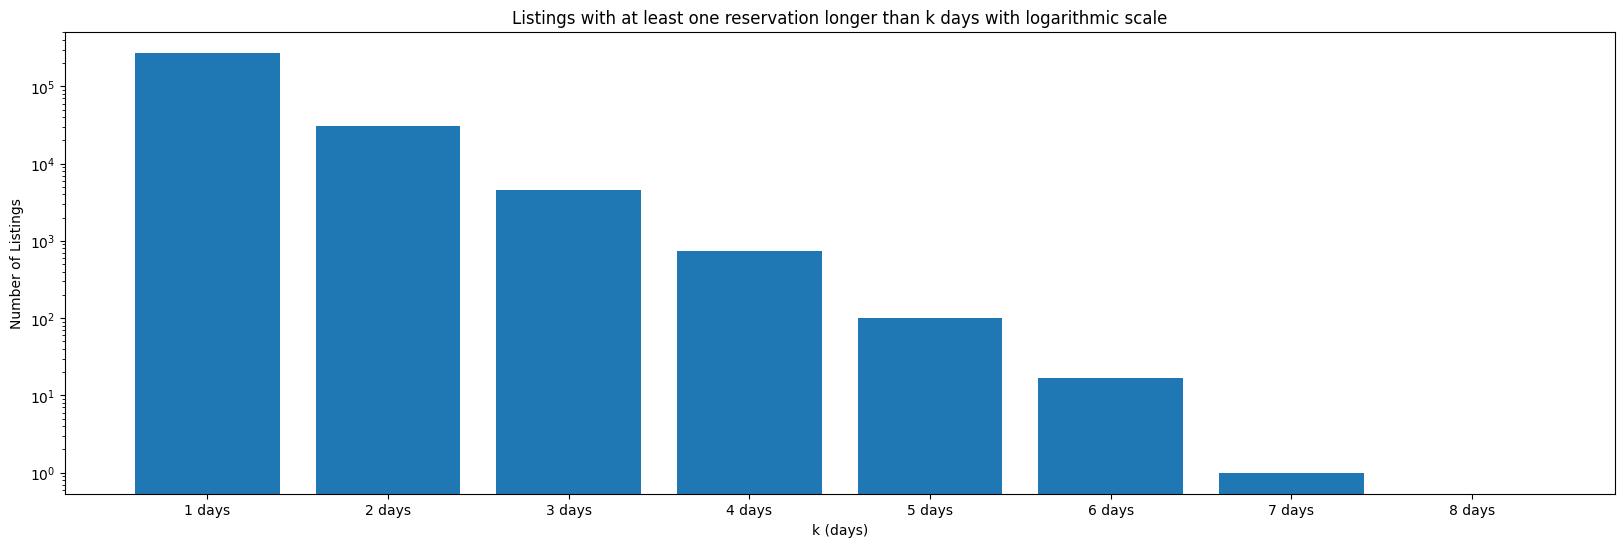

In [52]:
def get_listings_with_reservations_longer_than_k_days(k: int, df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    df = df[df['available'] == 'f']
    df['date'] = pd.to_datetime(df['date'])

    # drop NaN dates
    df = df.dropna(subset=['date'])

    # convert to datetime
    df['date'] = pd.to_datetime(df['date'])


    # Sort by listing_id and date
    df = df.sort_values(by=['listing_id', 'date'])

    # date difference
    df['prev_listing'] = df['listing_id'].shift()
    df['prev_date'] = df['date'].shift()
    df['date_diff'] = (df['date'] - df['prev_date']).dt.days.fillna(0)

    # flag to check if it's a new block
    df['new_block'] = (df['listing_id'] != df['prev_listing']) | (df['date_diff'] != 1)

    # identify blocks of consecutive days
    df['block_id'] = df['new_block'].cumsum()

    block_lengths = df.groupby('block_id').size().rename('consecutive_days')
    df = df.merge(block_lengths, on='block_id')

    # aggregations on listings
    reservations = df.groupby('block_id').agg(
        listing_id=('listing_id', 'first'),
        starting_day=('date', 'min'),
        last_day=('date', 'max'),
        price=('price', 'first'),
        minimum_nights=('minimum_nights', 'min'),
        maximum_nights=('maximum_nights', 'max'),
        nights=('consecutive_days', 'first'),
        adjusted_price=('adjusted_price', 'first'),
        available=('available', 'first'),
    ).reset_index(drop=True)


    # filter
    reservations = reservations[reservations['nights'] >= k]

    return reservations


heights = []
for k in [1, 2, 3, 4, 5, 6, 7, 8]:
    reservations = get_listings_with_reservations_longer_than_k_days(k, calendar_dataframe)
    print(f"Listings with at least one reservation longer than {k} days: {reservations.shape[0]}")
    heights.append(reservations.shape[0])

# bar plot with heights/total number of reservations

plt.figure(figsize=(20, 6))
plt.bar(range(1, 9), heights)
plt.yscale('log')
plt.title('Listings with at least one reservation longer than k days with logarithmic scale')
plt.xlabel('k (days)')
plt.ylabel('Number of Listings')
plt.xticks(range(1, 9), [f"{i} days" for i in range(1, 9)])
plt.show()

### Rozkład pomieszczeń z oferatmi wynajętymi na więcej niż k dni

In [53]:
def get_lisitng_df_with_selected_offers(listings: list, df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # filter
    df = df[df['id'].isin(listings)]

    return df


listings_list = get_listings_with_reservations_longer_than_k_days(5, calendar_dataframe)['listing_id'].unique().tolist()

df_listings = get_lisitng_df_with_selected_offers(listings_list, listings_dataframe)

df_listings.shape

(27, 77)

Unique values in property_type: 4
Unique values in room_type: 2
Unique values in accommodates: 6
Unique values in bathrooms: 2
Unique values in bathrooms_text: 4
Unique values in bedrooms: 4
Unique values in beds: 4
Unique values in price: 17


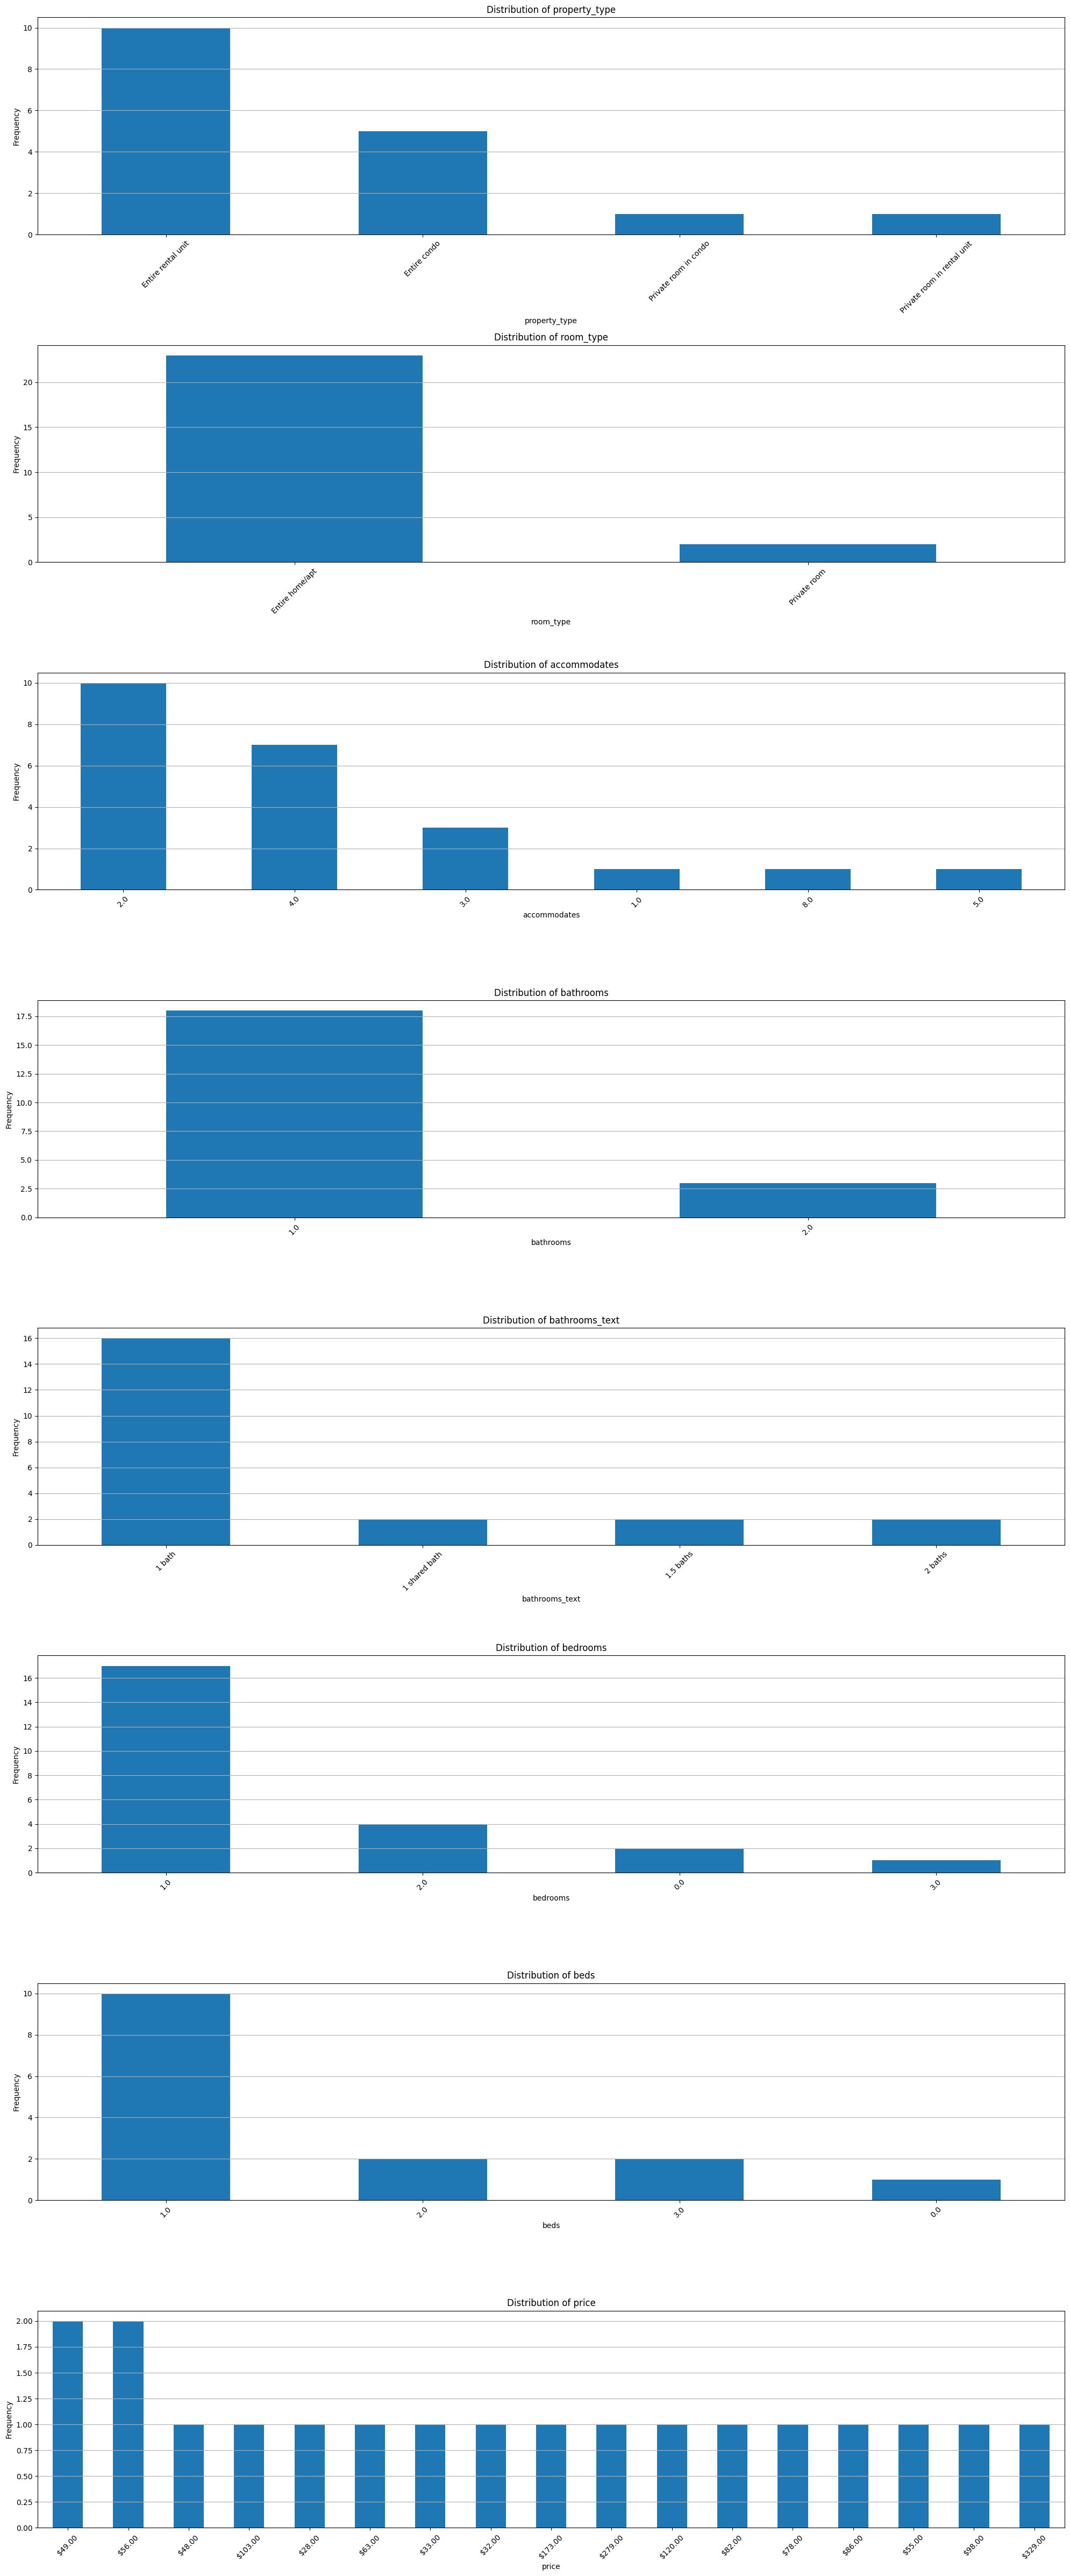

In [54]:
interesting_columns = ['property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'price']

length = len(interesting_columns)
fig, axs = plt.subplots(length, 1, figsize=(20, 6 * length))

for i, col in enumerate(interesting_columns):
    df_listings[col].value_counts().plot(kind='bar', ax=axs[i])
    axs[i].set_title(f"Distribution of {col}")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Frequency")
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].grid(axis='y')
    print(f"Unique values in {col}: {df_listings[col].nunique()}")
plt.tight_layout()
plt.show()

### Ilość ocen wybranych listingów

In [55]:
reviews_dataframe['listing_id'] = reviews_dataframe['listing_id'].astype(float)
df_listings['id'] = df_listings['id'].astype(float)

# Drop rows without a listing_id to avoid merge issues
reviews_dataframe = reviews_dataframe.dropna(subset=['listing_id'])

# Perform the merge
selected_reviews_listing_dataframe = pd.merge(
    reviews_dataframe,
    df_listings,
    how='inner',
    left_on='listing_id',
    right_on='id'
)


display(selected_reviews_listing_dataframe.head(5))
print(f"Shape of reviews for selected listings : {selected_reviews_listing_dataframe.shape}")

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,listing_url,scrape_id,last_scraped,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_city,host_country
0,12477603.000,110270108.000,2016-10-25,61598100.000,Sebastian,"Rita was a great host, a great pleasure to tal...",12477603.000,NaN,NaN,2024-12-25,...,4.730,00000978329,f,2.000,1.000,1.000,0.000,NaN,Athens,Greece
1,18791961.000,NaN,2023-07-23,21177261.000,David,"Genial, todo perfecto. Muy atentos, todo facil...",18791961.000,https://www.nocarz.pl/rooms/18791961,20241225065837.000,2024-12-25,...,4.810,NaN,t,38.000,38.000,0.000,0.000,NaN,Athens,Greece
2,19352717.000,1213689005619519488.000,2024-08-01,212931924.000,NaN,Abbiamo trascorso delle bellissime giornate ad...,19352717.000,https://www.nocarz.pl/rooms/19352717,20241225065837.000,2024-12-26,...,4.910,00000180127,f,1.000,1.000,NaN,0.000,3.710,Athens,Greece
3,33746831.000,1124512185244248576.000,2024-03-31,489602255.000,Iro,We had a great stay,33746831.000,https://www.nocarz.pl/rooms/33746831,20241225065837.000,2024-12-25,...,NaN,00000622043,f,3.000,3.000,0.000,0.000,2.130,Athens,Greece
4,22443289.000,239530648.000,2018-03-02,156084006.000,Justine,This apartment was truely perfect for us . Sup...,22443289.000,https://www.nocarz.pl/rooms/22443289,20241225065837.000,2024-12-25,...,4.840,00003100628,t,125.000,125.000,0.000,0.000,2.140,NaN,NaN


Shape of reviews for selected listings : (443, 83)


In [56]:
listing_avg_scores = selected_reviews_listing_dataframe.groupby('listing_id')['review_scores_rating'].mean().round(2)
listing_avg_scores = listing_avg_scores.reset_index(name='avg_rating')
listing_avg_scores = listing_avg_scores.sort_values(by='avg_rating', ascending=False)
listing_avg_scores.reset_index(drop=True, inplace=True)

listing_avg_scores['amount_of_reviews'] = selected_reviews_listing_dataframe.groupby('listing_id')['comments'].count().values
listing_avg_scores = listing_avg_scores.sort_values(
    by=['amount_of_reviews', 'avg_rating'],
    ascending=False
).reset_index(drop=True)

listing_avg_scores.head(10)

,listing_id,avg_rating,amount_of_reviews
0,962017761226983040.000,5.000,62
1,19352717.000,4.910,62
2,988890747703390336.000,5.000,55
3,1038821089988433536.000,4.980,34
4,986317668060990208.000,4.880,30
5,1165358076395743744.000,5.000,24
6,885464587598317952.000,4.880,19
7,700668791279971328.000,4.860,12
8,33657359.000,NaN,11
9,51437166.000,4.920,8


### Wyposażenie 

In [57]:
popular_amenities = {}

for idx, row in listings_dataframe.iterrows():
    items = row['amenities']
    items = str(items)
    items = items.replace("[", "")
    items = items.replace("]", "")

    for amenity in items.split(","):
        amenity = amenity.strip()

        if amenity in popular_amenities:
            popular_amenities[amenity] += 1
        else:
            popular_amenities[amenity] = 1

popular_amenities = dict(sorted(popular_amenities.items(), key=lambda item: item[1], reverse=True))

unique_amenities = len(popular_amenities)

print(f"Unique amenities: {unique_amenities}")

Unique amenities: 1419


### Stworzenie zmergowanego datasetu

In [58]:
users_dataframe.head(5)

,id,name,surname,city,street,street_number,postal_code
0,432845450.000,Julita,NaN,Malbork,NaN,NaN,29-597
1,45257839.000,Apolonia,Jaroch,Sosnowiec,Kwiatowa,29/56,NaN
2,484782310.000,Kalina,Dubik,Będzin,Dobra,97,NaN
3,486291306.000,NaN,Leonowicz,Luboń,Partyzantów,757,80-705
4,NaN,Marianna,Ciołczyk,Oleśnica,Kreta,NaN,89-001


In [59]:
listings_dataframe.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_city,host_country
0,30419466.000,https://www.nocarz.pl/rooms/30419466,20241225065837.000,2024-12-25,NaN,Athenian Niche in Plaka | Athenian Homes,NaN,NaN,https://a0.muscache.com/pictures/f6649b43-fcf6...,135482103.000,...,4.910,00000287535,t,12.000,12.000,0.000,0.000,2.510,Athens,Greece
1,49982681.000,https://www.nocarz.pl/rooms/49982681,20241225065837.000,2024-12-26,city scrape,Athenian Apartments - Syntagma sq. #1,Experience the vibrant heartbeat of Athens fro...,There are plenty of sights to see in Athens in...,NaN,NaN,...,NaN,00002033718,t,70.000,70.000,0.000,0.000,NaN,Athens,Greece
2,48800718.000,https://www.nocarz.pl/rooms/48800718,20241225065837.000,2024-12-25,city scrape,"Modern Penthouse with Parking, Terrace & BBQ",You will be staying at a unique rooftop Duplex...,Koukaki is a residential area of Athens but at...,https://a0.muscache.com/pictures/miso/Hosting-...,113548208.000,...,4.740,00003035440,t,90.000,NaN,0.000,0.000,3.080,Athens,Greece
3,1101264403993187968.000,https://www.nocarz.pl/rooms/1101264403993187936,20241225065837.000,2024-12-25,NaN,NaN,At Ma Maison Downtown Villa you will discover ...,Gazi is ideal for discovering Athens because o...,https://a0.muscache.com/pictures/hosting/Hosti...,118181401.000,...,4.860,00002489817,t,8.000,8.000,NaN,0.000,3.560,Athens,Greece
4,NaN,NaN,20241225065837.000,2024-12-25,city scrape,Stylish Contemporary Penthouse - Hip Athens Ce...,"Located in Kolonaki, Central Athens’ upmarket ...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,4899687.000,...,4.810,NaN,t,1.000,1.000,0.000,0.000,3.760,London,United Kingdom


In [60]:
calendar_dataframe.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,30142523.000,2025-02-04,t,80.000,NaN,2.000,1125.000
1,49766627.000,2025-01-23,t,125.000,NaN,1.000,1125.000
2,49300557.000,2025-07-30,NaN,100.000,NaN,NaN,NaN
3,743184230679279744.000,2025-03-06,t,NaN,NaN,1.000,1125.000
4,NaN,NaN,t,NaN,NaN,5.000,30.000


In [61]:
sessions_dataframe.head(5)

,action,user_id,timestamp,listing_id
0,browse_listings,NaN,2024-06-30T14:44:43.340297,NaN
1,view_listing,24106857.000,2024-06-30T15:08:59.340297,51696957.000
2,view_listing,NaN,2024-06-30T15:13:38.340297,902309243550043904.000
3,view_listing,24106857.000,NaN,1126007697624212992.000
4,NaN,24106857.000,NaN,NaN


In [62]:
sessions = sessions_dataframe[sessions_dataframe['action'] == 'book_listing']

cleared_users = users_dataframe.dropna(subset=['id'])


# tylko zabookwane sesje
df = pd.merge(
    sessions,
    cleared_users,
    how='inner',
    left_on='user_id',
    right_on='id'
).drop(columns=['id'], axis=1)

df.sort_values(by='user_id', ascending=False, inplace=True)

# pozbywamy sę listingów które są nan i timestampu który jest nan
df = df.dropna(subset=['listing_id', 'timestamp'])
df.head(5)

,action,user_id,timestamp,listing_id,name,surname,city,street,street_number,postal_code
27591,book_listing,667814172.000,2024-10-03T07:04:51.259369,1307335944358286592.000,NaN,Knieć,Suwałki,Agrestowa,NaN,98-983
114286,book_listing,667507585.000,2024-08-19T22:33:42.988544,1110916609422859904.000,Urszula,Heba,Oświęcim,Wyzwolenia,75,68-473
110631,book_listing,667237968.000,2024-05-02T06:28:24.641975,895009708605057792.000,NaN,Kuba,NaN,Wyspiańskiego,419,NaN
65254,book_listing,666808147.000,2024-10-01T22:59:50.955835,19480180.000,Ksawery,Wasiewicz,Żywiec,NaN,090,42-238
57018,book_listing,666803780.000,2024-05-09T02:49:41.543320,30506741.000,Sylwia,Lindner,Gliwice,Zielna,NaN,26-743


In [79]:
df_2 = pd.merge(
    df,
    listings_dataframe,
    how='inner',
    left_on='listing_id',
    right_on='id'
)

df_2.drop(columns=['id'], axis=1, inplace=True)

df_2['booking_date'] = pd.to_datetime(df_2['timestamp']).dt.date
df_2.head()


,action,user_id,timestamp,listing_id,name_x,surname,city,street,street_number,postal_code,...,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_city,host_country,booking_date
0,book_listing,667814172.000,2024-10-03T07:04:51.259369,1307335944358286592.000,NaN,Knieć,Suwałki,Agrestowa,NaN,98-983,...,00002378983,f,2.000,2.000,0.000,NaN,NaN,Glyfada,Greece,2024-10-03
1,book_listing,665741380.000,2024-08-17T00:09:03.460930,40031317.000,Alex,Wojtaszczyk,Jastrzębie-Zdrój,Zapolskiej,NaN,47-392,...,00000771426,NaN,NaN,1.000,0.000,0.000,2.240,Athens,Greece,2024-08-17
2,book_listing,665020081.000,2024-06-15T06:54:48.547653,38289234.000,Blanka,NaN,Łaziska Górne,Starowiejska,NaN,02-062,...,00000652170,f,7.000,7.000,0.000,0.000,NaN,Athens,Greece,2024-06-15
3,book_listing,664585642.000,2024-06-14T05:20:50.704580,1218018253810010112.000,NaN,Kalka,NaN,Klasztorna,67/18,14-973,...,01042995186,t,8.000,NaN,0.000,NaN,1.000,Pireas,Greece,2024-06-14
4,book_listing,664522481.000,2024-10-13T02:25:51.770984,1127332101920616576.000,Eryk,Bobryk,Legionowo,Strażacka,21/92,19-992,...,00001113740,t,4.000,4.000,0.000,NaN,3.140,NaN,NaN,2024-10-13


In [97]:
reservations = get_listings_with_reservations_longer_than_k_days(
    k=1,
    df=calendar_dataframe
)

reservations['starting_day'] = pd.to_datetime(reservations['starting_day']).dt.date
reservations

,listing_id,starting_day,last_day,price,minimum_nights,maximum_nights,nights,adjusted_price,available
0,27262.000,2024-12-26,2024-12-26,NaN,2.000,1125.000,1,NaN,f
1,27262.000,2024-12-29,2024-12-29,NaN,NaN,1125.000,1,NaN,f
2,27262.000,2025-01-03,2025-01-03,73.000,3.000,1125.000,1,NaN,f
3,49489.000,2024-12-27,2024-12-27,150.000,2.000,1125.000,1,NaN,f
4,60394.000,2025-06-30,2025-06-30,27.000,6.000,210.000,1,NaN,f
...,...,...,...,...,...,...,...,...,...
272804,NaN,2025-12-25,2025-12-25,NaN,14.000,365.000,1,NaN,f
272805,NaN,2025-12-25,2025-12-25,25.000,3.000,180.000,1,NaN,f
272806,NaN,2025-12-25,2025-12-25,85.000,NaN,NaN,1,NaN,f
272807,NaN,2025-12-25,2025-12-25,NaN,2.000,365.000,1,NaN,f


In [105]:

reservations = get_listings_with_reservations_longer_than_k_days(1, calendar_dataframe)
reservations['starting_day'] = pd.to_datetime(reservations['starting_day']).dt.date

reservations

,listing_id,starting_day,last_day,price,minimum_nights,maximum_nights,nights,adjusted_price,available
0,27262.000,2024-12-26,2024-12-26,NaN,2.000,1125.000,1,NaN,f
1,27262.000,2024-12-29,2024-12-29,NaN,NaN,1125.000,1,NaN,f
2,27262.000,2025-01-03,2025-01-03,73.000,3.000,1125.000,1,NaN,f
3,49489.000,2024-12-27,2024-12-27,150.000,2.000,1125.000,1,NaN,f
4,60394.000,2025-06-30,2025-06-30,27.000,6.000,210.000,1,NaN,f
...,...,...,...,...,...,...,...,...,...
272804,NaN,2025-12-25,2025-12-25,NaN,14.000,365.000,1,NaN,f
272805,NaN,2025-12-25,2025-12-25,25.000,3.000,180.000,1,NaN,f
272806,NaN,2025-12-25,2025-12-25,85.000,NaN,NaN,1,NaN,f
272807,NaN,2025-12-25,2025-12-25,NaN,2.000,365.000,1,NaN,f


In [106]:
df_2.head(5)

,action,user_id,timestamp,listing_id,name_x,surname,city,street,street_number,postal_code,...,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_city,host_country,booking_date
0,book_listing,667814172.000,2024-10-03T07:04:51.259369,1307335944358286592.000,NaN,Knieć,Suwałki,Agrestowa,NaN,98-983,...,00002378983,f,2.000,2.000,0.000,NaN,NaN,Glyfada,Greece,2024-10-03
1,book_listing,665741380.000,2024-08-17T00:09:03.460930,40031317.000,Alex,Wojtaszczyk,Jastrzębie-Zdrój,Zapolskiej,NaN,47-392,...,00000771426,NaN,NaN,1.000,0.000,0.000,2.240,Athens,Greece,2024-08-17
2,book_listing,665020081.000,2024-06-15T06:54:48.547653,38289234.000,Blanka,NaN,Łaziska Górne,Starowiejska,NaN,02-062,...,00000652170,f,7.000,7.000,0.000,0.000,NaN,Athens,Greece,2024-06-15
3,book_listing,664585642.000,2024-06-14T05:20:50.704580,1218018253810010112.000,NaN,Kalka,NaN,Klasztorna,67/18,14-973,...,01042995186,t,8.000,NaN,0.000,NaN,1.000,Pireas,Greece,2024-06-14
4,book_listing,664522481.000,2024-10-13T02:25:51.770984,1127332101920616576.000,Eryk,Bobryk,Legionowo,Strażacka,21/92,19-992,...,00001113740,t,4.000,4.000,0.000,NaN,3.140,NaN,NaN,2024-10-13


- Nie mamy informacji odnośnie w jakich terminach dokładnie użytkownik zarezerwował daną oferte wiec ciężko jest przyporządkować oferty do konkretnych użytkowników

In [ ]:
final_df = pd.merge(
    df_2,
    reservations,
    how='inner',
    left_on=['listing_id', 'booking_date'],
    right_on=['listing_id','starting_day' ]
)

final_df.head(5)

,action,user_id,timestamp,listing_id,name_x,surname,city,street,street_number,postal_code,...,host_country,booking_date,starting_day,last_day,price_y,minimum_nights_y,maximum_nights_y,nights,adjusted_price,available


In [110]:
final_df = pd.merge(
    df_2,
    reservations,
    how='inner',
    left_on=['listing_id',],
    right_on=['listing_id', ]
)

final_df.head(5)

,action,user_id,timestamp,listing_id,name_x,surname,city,street,street_number,postal_code,...,host_country,booking_date,starting_day,last_day,price_y,minimum_nights_y,maximum_nights_y,nights,adjusted_price,available
0,book_listing,665741380.000,2024-08-17T00:09:03.460930,40031317.000,Alex,Wojtaszczyk,Jastrzębie-Zdrój,Zapolskiej,NaN,47-392,...,Greece,2024-08-17,2024-12-28,2024-12-28,50.000,NaN,NaN,1,NaN,f
1,book_listing,665741380.000,2024-08-17T00:09:03.460930,40031317.000,Alex,Wojtaszczyk,Jastrzębie-Zdrój,Zapolskiej,NaN,47-392,...,Greece,2024-08-17,2025-01-02,2025-01-02,NaN,NaN,1125.000,1,NaN,f
2,book_listing,665741380.000,2024-08-17T00:09:03.460930,40031317.000,Alex,Wojtaszczyk,Jastrzębie-Zdrój,Zapolskiej,NaN,47-392,...,Greece,2024-08-17,2025-01-19,2025-01-19,50.000,NaN,1125.000,1,NaN,f
3,book_listing,665741380.000,2024-08-17T00:09:03.460930,40031317.000,Alex,Wojtaszczyk,Jastrzębie-Zdrój,Zapolskiej,NaN,47-392,...,Greece,2024-08-17,2025-02-19,2025-02-19,50.000,3.000,1125.000,1,NaN,f
4,book_listing,665741380.000,2024-08-17T00:09:03.460930,40031317.000,Alex,Wojtaszczyk,Jastrzębie-Zdrój,Zapolskiej,NaN,47-392,...,Greece,2024-08-17,2025-02-21,2025-02-21,50.000,NaN,1125.000,1,NaN,f
